## MVP using simple convolutions
Since NiftyNet works so well out of the box, I'll build a network from "scratch" to learn how to do that.

1) Initially pick one y to predict  
2) Use functional API to predict multiple y variables  
*    a) segmentation  
*    b) tumor type  
*    c) whether the patient survived  

Options for pretrained neural nets:
- VGG16
- VGG19
- ResNet50
- Inception v3

In [101]:
import numpy as np
import nibabel as nib

img = nib.load("/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/data/Brats17_2013_10_1_t2.nii.gz")

a = np.array(img.dataobj)
print('shape:', a.shape, '// max value:', max(set(np.unique(a))))

shape: (240, 240, 155) // max value: 1584


In [17]:
import tensorflow as tf

from keras import backend as K
import keras.utils.np_utils

from keras.models import Sequential
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, ZeroPadding1D
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
import numpy as np
import pandas as pd

from IPython.display import SVG
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import sys

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
K.backend()

'tensorflow'

In [19]:
import keras.backend as K
K.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')

In [20]:
def VGG_16(weights_pathweights =None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512,(3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [21]:
# !curl https://raw.githubusercontent.com/torch/tutorials/master/7_imagenet_classification/synset_words.txt -o synset_words.txt

In [22]:
#model = VGG_16('/Users/julialintern/Downloads/vgg16_weights_th_dim_ordering_th_kernels.h5')
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [23]:
model_vgg16_conv = keras.applications.VGG16(weights='imagenet')

In [24]:
synset = pd.read_csv('synset_words.txt', skipinitialspace=True, names = ['synset', 'words'])

In [25]:
def prepare_image(image_path):
    im = cv2.resize(cv2.imread(image_path), (224, 224)).astype(np.float32)
    # subtracting means across the color channels
    # (The mean pixel values are taken from the VGG authors)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    return im

In [26]:
image_path = '/Users/etheredgej/Desktop/imgs/dog2.jpg'

def predict_and_show(image_path):
    img = prepare_image(image_path)
    out = model_vgg16_conv.predict(img)
    y_pred = np.argmax(out)

    # im = cv2.imread('imgs/sloth.jpg',0) # for grayscale
    im = cv2.imread(image_path)
    h,w = im.shape[:2]
    # plt.imshow(im,cmap='gray') # for grayscale
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#     print(y_pred)
    print('label:',synset.loc[y_pred].synset)
    print('image shape:', im.shape)
    plt.imshow(im)
    plt.show()

label: n02112018 Pomeranian
image shape: (394, 400, 3)


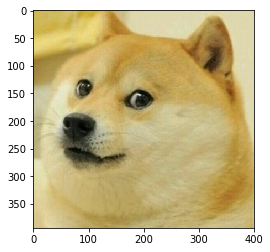

In [27]:
image_path = '/Users/etheredgej/Desktop/imgs/dog2.jpg'
predict_and_show(image_path)

label: n07930864 cup
image shape: (683, 1024, 3)


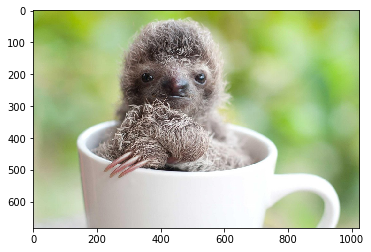

In [28]:
image_path = '/Users/etheredgej/Desktop/imgs/sloth.jpg'
predict_and_show(image_path)

In [29]:
img = nib.load("/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/HGG/Brats17_2013_10_1/Brats17_2013_10_1_t2.nii.gz")
a = np.array(img.dataobj)
a.shape

(240, 240, 155)

## All images appear to be 240x240x155:

In [36]:
from pathlib import Path
path_str = "/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/HGG/"
pathlist = Path(path_str).glob('**/*.nii.gz')
for path in pathlist:
    file_path_str = str(path)
#     print(file_path_str)
    img = nib.load(file_path_str)
    a = np.array(img.dataobj)
    print(a.shape)

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 24

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 24

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)


In [37]:
parition = pd.DataFrame()

In [ ]:
t1ce_names = []
from pathlib import Path
path_str = "/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/HGG/"
pathlist = Path(path_str).glob('**/*.nii.gz')
for path in pathlist:
    file_path_str = str(path)
    t1ce_names.append(file_path_str)
parition['files']=t1ce_names
parition['labels']=

In [ ]:
t1ce_names = []
from pathlib import Path
path_str = "/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/HGG/"
pathlist = Path(path_str).glob('**/*.nii.gz')
for path in pathlist:
    file_path_str = str(path)
    t1ce_names.append(file_path_str)

In [55]:
import png
png.from_array(a, 'L').save("Brats17_2013_10_1_t2.png")

label: n03729826 matchstick
image shape: (240, 240, 3)


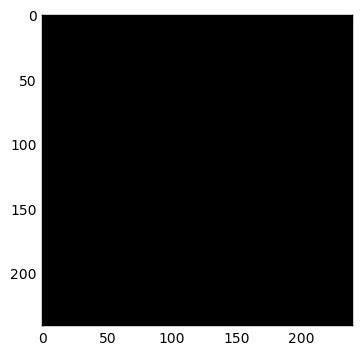

In [56]:
image_path = 'Brats17_2013_10_1_t2.png'
predict_and_show(image_path)

In [ ]:
from resnet3d import Resnet3DBuilder
model = Resnet3DBuilder.build_resnet_50((96, 96, 96, 1), 20)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32)

In [1]:
from __future__ import (
    absolute_import,
    division,
    print_function,
    unicode_literals
)
import six
from keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten
)
from keras.layers.convolutional import (
    Conv3D,
    AveragePooling3D,
    MaxPooling3D
)
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K

/Users/etheredgej/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def _bn_relu(input):
    """Helper to build a BN -> relu block (by @raghakot)."""
    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)

In [3]:
def _conv_bn_relu3D(**conv_params):
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1, 1))
    kernel_initializer = conv_params.setdefault(
        "kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer",
                                                l2(1e-4))

    def f(input):
        conv = Conv3D(filters=filters, kernel_size=kernel_size,
                      strides=strides, kernel_initializer=kernel_initializer,
                      padding=padding,
                      kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f

In [4]:
def _bn_relu_conv3d(**conv_params):
    """Helper to build a  BN -> relu -> conv3d block."""
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer",
                                                "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer",
                                                l2(1e-4))

    def f(input):
        activation = _bn_relu(input)
        return Conv3D(filters=filters, kernel_size=kernel_size,
                      strides=strides, kernel_initializer=kernel_initializer,
                      padding=padding,
                      kernel_regularizer=kernel_regularizer)(activation)
    return f

In [5]:
def _shortcut3d(input, residual):
    """3D shortcut to match input and residual and merges them with "sum"."""
    stride_dim1 = input._keras_shape[DIM1_AXIS] \
        // residual._keras_shape[DIM1_AXIS]
    stride_dim2 = input._keras_shape[DIM2_AXIS] \
        // residual._keras_shape[DIM2_AXIS]
    stride_dim3 = input._keras_shape[DIM3_AXIS] \
        // residual._keras_shape[DIM3_AXIS]
    equal_channels = residual._keras_shape[CHANNEL_AXIS] \
        == input._keras_shape[CHANNEL_AXIS]

    shortcut = input
    if stride_dim1 > 1 or stride_dim2 > 1 or stride_dim3 > 1 \
            or not equal_channels:
        shortcut = Conv3D(
            filters=residual._keras_shape[CHANNEL_AXIS],
            kernel_size=(1, 1, 1),
            strides=(stride_dim1, stride_dim2, stride_dim3),
            kernel_initializer="he_normal", padding="valid",
            kernel_regularizer=l2(1e-4)
            )(input)
    return add([shortcut, residual])

In [6]:
def _residual_block3d(block_function, filters, kernel_regularizer, repetitions,
                      is_first_layer=False):
    def f(input):
        for i in range(repetitions):
            strides = (1, 1, 1)
            if i == 0 and not is_first_layer:
                strides = (2, 2, 2)
            input = block_function(filters=filters, strides=strides,
                                   kernel_regularizer=kernel_regularizer,
                                   is_first_block_of_first_layer=(
                                       is_first_layer and i == 0)
                                   )(input)
        return input

    return f

In [7]:
def basic_block(filters, strides=(1, 1, 1), kernel_regularizer=l2(1e-4),
                is_first_block_of_first_layer=False):
    """Basic 3 X 3 X 3 convolution blocks. Extended from raghakot's 2D impl."""
    def f(input):
        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = Conv3D(filters=filters, kernel_size=(3, 3, 3),
                           strides=strides, padding="same",
                           kernel_initializer="he_normal",
                           kernel_regularizer=kernel_regularizer
                           )(input)
        else:
            conv1 = _bn_relu_conv3d(filters=filters,
                                    kernel_size=(3, 3, 3),
                                    strides=strides,
                                    kernel_regularizer=kernel_regularizer
                                    )(input)

        residual = _bn_relu_conv3d(filters=filters, kernel_size=(3, 3, 3),
                                   kernel_regularizer=kernel_regularizer
                                   )(conv1)
        return _shortcut3d(input, residual)

    return f

In [8]:
def bottleneck(filters, strides=(1, 1, 1), kernel_regularizer=l2(1e-4),
               is_first_block_of_first_layer=False):
    """Basic 3 X 3 X 3 convolution blocks. Extended from raghakot's 2D impl."""
    def f(input):
        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv_1_1 = Conv3D(filters=filters, kernel_size=(1, 1, 1),
                              strides=strides, padding="same",
                              kernel_initializer="he_normal",
                              kernel_regularizer=kernel_regularizer
                              )(input)
        else:
            conv_1_1 = _bn_relu_conv3d(filters=filters, kernel_size=(1, 1, 1),
                                       strides=strides,
                                       kernel_regularizer=kernel_regularizer
                                       )(input)

        conv_3_3 = _bn_relu_conv3d(filters=filters, kernel_size=(3, 3, 3),
                                   kernel_regularizer=kernel_regularizer
                                   )(conv_1_1)
        residual = _bn_relu_conv3d(filters=filters * 4, kernel_size=(1, 1, 1),
                                   kernel_regularizer=kernel_regularizer
                                   )(conv_3_3)

        return _shortcut3d(input, residual)

    return f

In [9]:
def _handle_data_format():
    global DIM1_AXIS
    global DIM2_AXIS
    global DIM3_AXIS
    global CHANNEL_AXIS
    if K.image_data_format() == 'channels_last':
        DIM1_AXIS = 1
        DIM2_AXIS = 2
        DIM3_AXIS = 3
        CHANNEL_AXIS = 4
    else:
        CHANNEL_AXIS = 1
        DIM1_AXIS = 2
        DIM2_AXIS = 3
        DIM3_AXIS = 4

In [10]:
def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier

In [68]:
class Resnet3DBuilder(object):
    """ResNet3D."""

    @staticmethod
    def build(input_shape, num_outputs, block_fn, repetitions, reg_factor):
        """Instantiate a vanilla ResNet3D keras model.

        # Arguments
            input_shape: Tuple of input shape in the format
            (conv_dim1, conv_dim2, conv_dim3, channels) if dim_ordering='tf'
            (filter, conv_dim1, conv_dim2, conv_dim3) if dim_ordering='th'
            num_outputs: The number of outputs at the final softmax layer
            block_fn: Unit block to use {'basic_block', 'bottlenack_block'}
            repetitions: Repetitions of unit blocks
        # Returns
            model: a 3D ResNet model that takes a 5D tensor (volumetric images
            in batch) as input and returns a 1D vector (prediction) as output.
        """
        _handle_data_format()
        if len(input_shape) != 4:
            raise ValueError("Input shape should be a tuple "
                             "(conv_dim1, conv_dim2, conv_dim3, channels) "
                             "for tensorflow as backend or "
                             "(channels, conv_dim1, conv_dim2, conv_dim3) "
                             "for theano as backend")

        block_fn = _get_block(block_fn)
        input = Input(shape=input_shape)
        # first conv
        conv1 = _conv_bn_relu3D(filters=64, kernel_size=(7, 7, 7),
                                strides=(2, 2, 2),
                                kernel_regularizer=l2(reg_factor)
                                )(input)
        pool1 = MaxPooling3D(pool_size=(3, 3, 3), strides=(2, 2, 2),
                             padding="same")(conv1)

        # repeat blocks
        block = pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block3d(block_fn, filters=filters,
                                      kernel_regularizer=l2(reg_factor),
                                      repetitions=r, is_first_layer=(i == 0)
                                      )(block)
            filters *= 2

        # last activation
        block_output = _bn_relu(block)

        # average poll and classification
        pool2 = AveragePooling3D(pool_size=(block._keras_shape[DIM1_AXIS],
                                            block._keras_shape[DIM2_AXIS],
                                            block._keras_shape[DIM3_AXIS]),
                                 strides=(1, 1, 1))(block_output)
        flatten1 = Flatten()(pool2)
        if num_outputs > 1:
            dense = Dense(units=num_outputs,
                          kernel_initializer="he_normal",
                          activation="softmax",
                          kernel_regularizer=l2(reg_factor))(flatten1)
        else:
            dense = Dense(units=num_outputs,
                          kernel_initializer="he_normal",
                          activation="sigmoid",
                          kernel_regularizer=l2(reg_factor))(flatten1)

        model = Model(inputs=input, outputs=dense)
        return model

    @staticmethod
    def build_resnet_18(input_shape, num_outputs, reg_factor=1e-4):
        """Build resnet 18."""
        return Resnet3DBuilder.build(input_shape, num_outputs, basic_block,
                                     [2, 2, 2, 2], reg_factor=reg_factor)

    @staticmethod
    def build_resnet_34(input_shape, num_outputs, reg_factor=1e-4):
        """Build resnet 34."""
        return Resnet3DBuilder.build(input_shape, num_outputs, basic_block,
                                     [3, 4, 6, 3], reg_factor=reg_factor)

    @staticmethod
    def build_resnet_50(input_shape, num_outputs, reg_factor=1e-4):
        """Build resnet 50."""
        return Resnet3DBuilder.build(input_shape, num_outputs, bottleneck,
                                     [3, 4, 6, 3], reg_factor=reg_factor)

    @staticmethod
    def build_resnet_101(input_shape, num_outputs, reg_factor=1e-4):
        """Build resnet 101."""
        return Resnet3DBuilder.build(input_shape, num_outputs, bottleneck,
                                     [3, 4, 23, 3], reg_factor=reg_factor)

    @staticmethod
    def build_resnet_152(input_shape, num_outputs, reg_factor=1e-4):
        """Build resnet 152."""
        return Resnet3DBuilder.build(input_shape, num_outputs, bottleneck,
                                     [3, 8, 36, 3], reg_factor=reg_factor)

## Define the Keras data loader for the 3D net:

In [69]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(240,240,155), n_channels=1,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        # Decode and load the data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
#             X[i,] = np.load('data/' + ID + '.npy')
            imgpath = '/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/data/' + ID + '_flair.nii.gz'
            img = nib.load(imgpath)
            X[i,] = np.array(img.dataobj)

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

## Data loader for 3D keras net:

In [ ]:
# move all files to parent folder in bash:
# find . -mindepth 2 -type f -print -exec mv {} . \;

### Get the list of patients that belong to each set:

In [48]:
# from glob import glob
# paths = glob('/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/HGG/*/')
# print(paths)

import os
HGG_dir_list = next(os.walk('/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/HGG/'))[1]
print(len(HGG_dir_list))
LGG_dir_list = next(os.walk('/Users/etheredgej/Desktop/MICCAI_BraTS17_Data_Training/train/LGG/'))[1]
print(len(LGG_dir_list))

210
75


### Making the dictionaries for the data generator:
- HGG = 0
- LGG = 1

In [55]:
completelist = HGG_dir_list + LGG_dir_list
# print(completelist[0:4])
np.random.shuffle(completelist) # shuffles in place
# print(completelist[0:4])

partition={}
train_percentage=0.7
partition['train']=completelist[0:int(len(completelist)*train_percentage)]
partition['test']=completelist[int(len(completelist)*train_percentage):len(completelist)]

labels={}
# HGG=0
# LGG=1
for directory in HGG_dir_list:
    labels[directory]=0
for directory in LGG_dir_list:
    labels[directory]=1

In [56]:
partition

{'train': ['Brats17_TCIA_499_1',
  'Brats17_TCIA_630_1',
  'Brats17_CBICA_ABY_1',
  'Brats17_TCIA_346_1',
  'Brats17_CBICA_ATV_1',
  'Brats17_CBICA_AOZ_1',
  'Brats17_TCIA_640_1',
  'Brats17_CBICA_AQR_1',
  'Brats17_TCIA_241_1',
  'Brats17_CBICA_AXW_1',
  'Brats17_TCIA_278_1',
  'Brats17_CBICA_ARW_1',
  'Brats17_CBICA_ABN_1',
  'Brats17_TCIA_428_1',
  'Brats17_2013_9_1',
  'Brats17_TCIA_470_1',
  'Brats17_CBICA_ARZ_1',
  'Brats17_CBICA_BFB_1',
  'Brats17_TCIA_167_1',
  'Brats17_2013_24_1',
  'Brats17_2013_19_1',
  'Brats17_CBICA_ANZ_1',
  'Brats17_TCIA_312_1',
  'Brats17_TCIA_180_1',
  'Brats17_CBICA_ABO_1',
  'Brats17_CBICA_AXL_1',
  'Brats17_CBICA_AQN_1',
  'Brats17_TCIA_162_1',
  'Brats17_TCIA_629_1',
  'Brats17_CBICA_ASW_1',
  'Brats17_TCIA_623_1',
  'Brats17_TCIA_165_1',
  'Brats17_CBICA_AYU_1',
  'Brats17_TCIA_605_1',
  'Brats17_CBICA_ARF_1',
  'Brats17_TCIA_429_1',
  'Brats17_2013_28_1',
  'Brats17_TCIA_201_1',
  'Brats17_TCIA_471_1',
  'Brats17_TCIA_419_1',
  'Brats17_TCIA_644_

In [94]:
# from resnet3d import Resnet3DBuilder
model = Resnet3DBuilder.build_resnet_50(input_shape=(240, 240, 160, 1), num_outputs=2)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.fit(X_train, y_train, batch_size=32)

# def build_resnet_152(input_shape, num_outputs, reg_factor=1e-4):
#     """Build resnet 152."""
#     return Resnet3DBuilder.build(input_shape, num_outputs, bottleneck,
#                                  [3, 8, 36, 3], reg_factor=reg_factor)

ValueError: Operands could not be broadcast together with shapes (2048, 15, 5, 1) (2048, 8, 5, 1)

In [60]:
import numpy as np

from keras.models import Sequential
# from my_classes import DataGenerator

# Parameters
params = {'dim': (240,240,155),
          'batch_size': 32,
          'n_classes': 2,
          'n_channels': 1,
          'shuffle': True}

# # Datasets
# partition = # IDs
# labels = # Labels

# Generators
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['test'], labels, **params)

# # Design model
# model = Sequential()
# [...] # Architecture
# model.compile()

# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=4)

NameError: name 'model' is not defined

In [ ]:
# keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
#                                              samplewise_center=False,
#                                              featurewise_std_normalization=False, 
#                                              samplewise_std_normalization=False, 
#                                              zca_whitening=False, zca_epsilon=1e-06, 
#                                              rotation_range=0.0, width_shift_range=0.0,
#                                              height_shift_range=0.0, brightness_range=None, 
#                                              shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, 
#                                              fill_mode='nearest', cval=0.0, horizontal_flip=False, 
#                                              vertical_flip=False, rescale=None, preprocessing_function=None, 
#                                              data_format=None, validation_split=0.0)

In [ ]:
# train_datagen = ImageDataGenerator()

# test_datagen = ImageDataGenerator()

# train_generator = train_datagen.flow_from_directory(
#         'data/train',
#         target_size=(240, 240, 155),
#         batch_size=32,
#         class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         'data/validation',
#         target_size=(240, 240, 155),
#         batch_size=32,
#         class_mode='binary')

# model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

### This is 3DUnetCNN:

In [84]:
from functools import partial

from keras.layers import Input, LeakyReLU, Add, UpSampling3D, Activation, SpatialDropout3D
from keras.engine import Model
from keras.optimizers import Adam

import numpy as np
from keras import backend as K
from keras.engine import Input, Model
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU, Deconvolution3D
from keras.optimizers import Adam

K.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')

try:
    from keras.engine import merge
except ImportError:
    from keras.layers.merge import concatenate
    
def dice_coefficient(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coefficient_loss(y_true, y_pred):
    return -dice_coefficient(y_true, y_pred)


def weighted_dice_coefficient(y_true, y_pred, axis=(-3, -2, -1), smooth=0.00001):
    """
    Weighted dice coefficient. Default axis assumes a "channels first" data structure
    :param smooth:
    :param y_true:
    :param y_pred:
    :param axis:
    :return:
    """
    return K.mean(2. * (K.sum(y_true * y_pred,
                              axis=axis) + smooth/2)/(K.sum(y_true,
                                                            axis=axis) + K.sum(y_pred,
                                                                               axis=axis) + smooth))


def weighted_dice_coefficient_loss(y_true, y_pred):
    return -weighted_dice_coefficient(y_true, y_pred)


def label_wise_dice_coefficient(y_true, y_pred, label_index):
    return dice_coefficient(y_true[:, label_index], y_pred[:, label_index])


def get_label_dice_coefficient_function(label_index):
    f = partial(label_wise_dice_coefficient, label_index=label_index)
    f.__setattr__('__name__', 'label_{0}_dice_coef'.format(label_index))
    return f


dice_coef = dice_coefficient
dice_coef_loss = dice_coefficient_loss




def unet_model_3d(input_shape, pool_size=(2, 2, 2), n_labels=1, initial_learning_rate=0.00001, deconvolution=False,
                  depth=4, n_base_filters=32, include_label_wise_dice_coefficients=False, metrics=dice_coefficient,
                  batch_normalization=False, activation_name="sigmoid"):
    """
    Builds the 3D UNet Keras model.f
    :param metrics: List metrics to be calculated during model training (default is dice coefficient).
    :param include_label_wise_dice_coefficients: If True and n_labels is greater than 1, model will report the dice
    coefficient for each label as metric.
    :param n_base_filters: The number of filters that the first layer in the convolution network will have. Following
    layers will contain a multiple of this number. Lowering this number will likely reduce the amount of memory required
    to train the model.
    :param depth: indicates the depth of the U-shape for the model. The greater the depth, the more max pooling
    layers will be added to the model. Lowering the depth may reduce the amount of memory required for training.
    :param input_shape: Shape of the input data (n_chanels, x_size, y_size, z_size). The x, y, and z sizes must be
    divisible by the pool size to the power of the depth of the UNet, that is pool_size^depth.
    :param pool_size: Pool size for the max pooling operations.
    :param n_labels: Number of binary labels that the model is learning.
    :param initial_learning_rate: Initial learning rate for the model. This will be decayed during training.
    :param deconvolution: If set to True, will use transpose convolution(deconvolution) instead of up-sampling. This
    increases the amount memory required during training.
    :return: Untrained 3D UNet Model
    """
    inputs = Input(input_shape)
    current_layer = inputs
    levels = list()

    # add levels with max pooling
    for layer_depth in range(depth):
        layer1 = create_convolution_block(input_layer=current_layer, n_filters=n_base_filters*(2**layer_depth),
                                          batch_normalization=batch_normalization)
        layer2 = create_convolution_block(input_layer=layer1, n_filters=n_base_filters*(2**layer_depth)*2,
                                          batch_normalization=batch_normalization)
        if layer_depth < depth - 1:
            current_layer = MaxPooling3D(pool_size=pool_size)(layer2)
            levels.append([layer1, layer2, current_layer])
        else:
            current_layer = layer2
            levels.append([layer1, layer2])

    # add levels with up-convolution or up-sampling
    for layer_depth in range(depth-2, -1, -1):
        up_convolution = get_up_convolution(pool_size=pool_size, deconvolution=deconvolution,
                                            n_filters=current_layer._keras_shape[1])(current_layer)
        concat = concatenate([up_convolution, levels[layer_depth][1]], axis=1)
        current_layer = create_convolution_block(n_filters=levels[layer_depth][1]._keras_shape[1],
                                                 input_layer=concat, batch_normalization=batch_normalization)
        current_layer = create_convolution_block(n_filters=levels[layer_depth][1]._keras_shape[1],
                                                 input_layer=current_layer,
                                                 batch_normalization=batch_normalization)

    final_convolution = Conv3D(n_labels, (1, 1, 1))(current_layer)
    act = Activation(activation_name)(final_convolution)
    model = Model(inputs=inputs, outputs=act)

    if not isinstance(metrics, list):
        metrics = [metrics]

    if include_label_wise_dice_coefficients and n_labels > 1:
        label_wise_dice_metrics = [get_label_dice_coefficient_function(index) for index in range(n_labels)]
        if metrics:
            metrics = metrics + label_wise_dice_metrics
        else:
            metrics = label_wise_dice_metrics

    model.compile(optimizer=Adam(lr=initial_learning_rate), loss=dice_coefficient_loss, metrics=metrics)
    return model


def create_convolution_block(input_layer, n_filters, batch_normalization=False, kernel=(3, 3, 3), activation=None,
                             padding='same', strides=(1, 1, 1), instance_normalization=False):
    """
    :param strides:
    :param input_layer:
    :param n_filters:
    :param batch_normalization:
    :param kernel:
    :param activation: Keras activation layer to use. (default is 'relu')
    :param padding:
    :return:
    """
    layer = Conv3D(n_filters, kernel, padding=padding, strides=strides)(input_layer)
    if batch_normalization:
        layer = BatchNormalization(axis=1)(layer)
    elif instance_normalization:
        try:
            from keras_contrib.layers.normalization import InstanceNormalization
        except ImportError:
            raise ImportError("Install keras_contrib in order to use instance normalization."
                              "\nTry: pip install git+https://www.github.com/farizrahman4u/keras-contrib.git")
        layer = InstanceNormalization(axis=1)(layer)
    if activation is None:
        return Activation('relu')(layer)
    else:
        return activation()(layer)


def compute_level_output_shape(n_filters, depth, pool_size, image_shape):
    """
    Each level has a particular output shape based on the number of filters used in that level and the depth or number 
    of max pooling operations that have been done on the data at that point.
    :param image_shape: shape of the 3d image.
    :param pool_size: the pool_size parameter used in the max pooling operation.
    :param n_filters: Number of filters used by the last node in a given level.
    :param depth: The number of levels down in the U-shaped model a given node is.
    :return: 5D vector of the shape of the output node 
    """
    output_image_shape = np.asarray(np.divide(image_shape, np.power(pool_size, depth)), dtype=np.int32).tolist()
    return tuple([None, n_filters] + output_image_shape)


def get_up_convolution(n_filters, pool_size, kernel_size=(2, 2, 2), strides=(2, 2, 2),
                       deconvolution=False):
    if deconvolution:
        return Deconvolution3D(filters=n_filters, kernel_size=kernel_size,
                               strides=strides)
    else:
        return UpSampling3D(size=pool_size)







create_convolution_block = partial(create_convolution_block, activation=LeakyReLU, instance_normalization=True)


def isensee2017_model(input_shape=(4, 128, 128, 128), n_base_filters=16, depth=5, dropout_rate=0.3,
                      n_segmentation_levels=3, n_labels=4, optimizer=Adam, initial_learning_rate=5e-4,
                      loss_function=weighted_dice_coefficient_loss, activation_name="sigmoid"):
    """
    This function builds a model proposed by Isensee et al. for the BRATS 2017 competition:
    https://www.cbica.upenn.edu/sbia/Spyridon.Bakas/MICCAI_BraTS/MICCAI_BraTS_2017_proceedings_shortPapers.pdf
    This network is highly similar to the model proposed by Kayalibay et al. "CNN-based Segmentation of Medical
    Imaging Data", 2017: https://arxiv.org/pdf/1701.03056.pdf
    :param input_shape:
    :param n_base_filters:
    :param depth:
    :param dropout_rate:
    :param n_segmentation_levels:
    :param n_labels:
    :param optimizer:
    :param initial_learning_rate:
    :param loss_function:
    :param activation_name:
    :return:
    """
    inputs = Input(input_shape)

    current_layer = inputs
    level_output_layers = list()
    level_filters = list()
    for level_number in range(depth):
        n_level_filters = (2**level_number) * n_base_filters
        level_filters.append(n_level_filters)

        if current_layer is inputs:
            in_conv = create_convolution_block(current_layer, n_level_filters)
        else:
            in_conv = create_convolution_block(current_layer, n_level_filters, strides=(2, 2, 2))

        context_output_layer = create_context_module(in_conv, n_level_filters, dropout_rate=dropout_rate)

        summation_layer = Add()([in_conv, context_output_layer])
        level_output_layers.append(summation_layer)
        current_layer = summation_layer

    segmentation_layers = list()
    for level_number in range(depth - 2, -1, -1):
        up_sampling = create_up_sampling_module(current_layer, level_filters[level_number])
        concatenation_layer = concatenate([level_output_layers[level_number], up_sampling], axis=1)
        localization_output = create_localization_module(concatenation_layer, level_filters[level_number])
        current_layer = localization_output
        if level_number < n_segmentation_levels:
            segmentation_layers.insert(0, create_convolution_block(current_layer, n_filters=n_labels, kernel=(1, 1, 1)))

    output_layer = None
    for level_number in reversed(range(n_segmentation_levels)):
        segmentation_layer = segmentation_layers[level_number]
        if output_layer is None:
            output_layer = segmentation_layer
        else:
            output_layer = Add()([output_layer, segmentation_layer])

        if level_number > 0:
            output_layer = UpSampling3D(size=(2, 2, 2))(output_layer)

    activation_block = Activation(activation_name)(output_layer)

    model = Model(inputs=inputs, outputs=activation_block)
    model.compile(optimizer=optimizer(lr=initial_learning_rate), loss=loss_function)
    return model


def create_localization_module(input_layer, n_filters):
    convolution1 = create_convolution_block(input_layer, n_filters)
    convolution2 = create_convolution_block(convolution1, n_filters, kernel=(1, 1, 1))
    return convolution2


def create_up_sampling_module(input_layer, n_filters, size=(2, 2, 2)):
    up_sample = UpSampling3D(size=size)(input_layer)
    convolution = create_convolution_block(up_sample, n_filters)
    return convolution


def create_context_module(input_layer, n_level_filters, dropout_rate=0.3, data_format="channels_first"):
    convolution1 = create_convolution_block(input_layer=input_layer, n_filters=n_level_filters)
    dropout = SpatialDropout3D(rate=dropout_rate, data_format=data_format)(convolution1)
    convolution2 = create_convolution_block(input_layer=dropout, n_filters=n_level_filters)
    return convolution2

In [92]:
model = isensee2017_model(input_shape=(1, 240, 240, None), n_base_filters=16, depth=5, dropout_rate=0.3,
                      n_segmentation_levels=3, n_labels=2, optimizer=Adam, initial_learning_rate=5e-4,
                      loss_function=weighted_dice_coefficient_loss, activation_name="sigmoid")